Matriz de tranformación Homogenea

La derivación de la matriz de transformación homogénea es similar al caso 2D de la ecuación. Pero ampliado para tener en cuenta la dimensión z. t ∈ R3 es un vector que define el origen de la trama {B} con respecto a la trama {A}, y R es la matriz orto normal de 3 × 3 que describe la orientación de los ejes de la trama {B} con respecto a la trama {A} .


<img src=Image/Imagen_1.png>

Ejercicio Práctico
Como se muestra en la siguiente imagen se tiene un objeto con coordenadas [20, 0] desde de el marco de referencia ee, ¿Cúales son las coordenadas del objeto desde la base?


<img src=Image/Imagen_2.png>

Importamos Módulos necesarios

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Generamos la matriz de tranformación de J1 a la base
primero calcularemos el ángulo theta de rotacion del marco de referencia de la base al marco de referencia j1. El cúal estaria dado por 120 - 90


In [25]:
theta = (30 * np.pi/180) # realizamos las operaciones en radianes

Ahora calculamos la matriz de rotación

In [45]:
rotationMatrix = np.array([[np.cos(theta), -np.sin(theta)],
                          [np.sin(theta), np.cos(theta)]])
print(rotationMatrix)

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


Construimos el vector de traslación

In [46]:
phi = (120 * np.pi)/180
translationVector = np.array([[100*np.cos(phi)],[100*np.sin(phi)]])
print(translationVector)

[[-50.        ]
 [ 86.60254038]]


construimos la matriz de tranformación homogenea

In [47]:
rtMatrix = np.concatenate((rotationMatrix,translationVector),axis = 1)
j1Tb = np.concatenate((rtMatrix,[[0,0,1]]),axis = 0)
print(j1Tb)

[[  0.8660254   -0.5        -50.        ]
 [  0.5          0.8660254   86.60254038]
 [  0.           0.           1.        ]]


repetimos los pasos para la transformacion j1,j2

In [49]:
theta2 = (0 * np.pi/180) # realizamos las operaciones en radianes
rotationMatrix2 = np.array([[np.cos(theta2), -np.sin(theta2)],
                          [np.sin(theta2), np.cos(theta2)]])
print(rotationMatrix2)
phi2 = (0 * np.pi)/180

translationVector2 = np.array([[100*np.cos(phi2)],[100*np.sin(phi2)]])
print(translationVector2)
rtMatrix2 = np.concatenate((rotationMatrix2,translationVector2),axis = 1)
j2Tj1 = np.concatenate((rtMatrix2,[[0,0,1]]),axis = 0)
print(j2Tj1)

[[ 1. -0.]
 [ 0.  1.]]
[[100.]
 [  0.]]
[[  1.  -0. 100.]
 [  0.   1.   0.]
 [  0.   0.   1.]]


ahora realizamos la tranformación j2 a ee

In [50]:
theta3 = (-45 * np.pi/180) # realizamos las operaciones en radianes
rotationMatrix3 = np.array([[np.cos(theta3), -np.sin(theta3)],
                          [np.sin(theta3), np.cos(theta3)]])
print(rotationMatrix3)
phi3 = (-45 * np.pi)/180

translationVector3 = np.array([[50*np.cos(phi3)],[50*np.sin(phi3)]])
print(translationVector3)
rtMatrix3 = np.concatenate((rotationMatrix3,translationVector3),axis = 1)
eeTj2 = np.concatenate((rtMatrix3,[[0,0,1]]),axis = 0)
print(eeTj2)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[ 35.35533906]
 [-35.35533906]]
[[  0.70710678   0.70710678  35.35533906]
 [ -0.70710678   0.70710678 -35.35533906]
 [  0.           0.           1.        ]]


ahora calculamos la tranformacion de j2 a base

In [51]:
j2Tb = j1Tb.dot(j2Tj1)
print(j2Tb)

[[  0.8660254   -0.5         36.60254038]
 [  0.5          0.8660254  136.60254038]
 [  0.           0.           1.        ]]


Calculamos la tranformación de ee a base

In [52]:
eeTb = j2Tb.dot(eeTj2)
print(eeTb)

[[  0.96592583   0.25881905  84.89883169]
 [ -0.25881905   0.96592583 123.66158812]
 [  0.           0.           1.        ]]


In [53]:
objetoEE = [20,0,1]
ObjetoBase = eeTb.dot(objetoEE)
print(ObjetoBase)

[104.21734822 118.48520722   1.        ]


In [58]:
xBJ1 = j1Tb[0,2]
yBj1 = j1Tb[1,2]

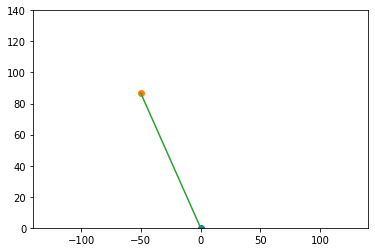

In [59]:
fig, axes = plt.subplots()
# primero los puntosj
plt.plot(0,0, 'o')
plt.plot(xBJ1,yBj1, 'o')
# plt.plot(x_J2,y_J2, 'o')
# plt.plot(x_ee,y_ee, 'x')
# plt.plot(x_objeto, y_objeto, 'bo')
# grafiquemos luego las lineas
plt.plot([0,xBJ1],[0,yBj1])
# ajustamos los ejes
axes.set_xlim(-140,140)
axes.set_ylim(0,140)
plt.show()